In [1]:
import pandas as pd
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
import matplotlib.pyplot as plt

In [2]:
df=pd.read_csv('preprocessed_data.csv')

In [53]:
X=df.drop(['World Rank','Region Rank','Score Category'], axis=1)
y=df[['Score Category']]

In [54]:
oversample = SMOTE()
X, y = oversample.fit_resample(X, y)

In [55]:
X.shape

(990, 32)

In [56]:
y

,Score Category
0,3
1,5
2,5
3,3
4,1
...,...
985,5
986,5
987,5
988,5


In [57]:
dummies = pd.get_dummies(y['Score Category'])   #to provide binary values to the text variables
dummies

,1,2,3,4,5
0,0,0,1,0,0
1,0,0,0,0,1
2,0,0,0,0,1
3,0,0,1,0,0
4,1,0,0,0,0
...,...,...,...,...,...
985,0,0,0,0,1
986,0,0,0,0,1
987,0,0,0,0,1
988,0,0,0,0,1


In [58]:
y=dummies

In [59]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import roc_curve, roc_auc_score
from sklearn.model_selection import GridSearchCV
from sklearn import svm
from imblearn.over_sampling import SMOTE

In [60]:
X.columns[(X < 0).any()]

Index(['GDP Growth Rate (%)', '5 Year GDP Growth Rate (%)', 'Inflation (%)',
       'FDI Inflow (Millions)'],
      dtype='object')

<AxesSubplot:xlabel='variable', ylabel='value'>

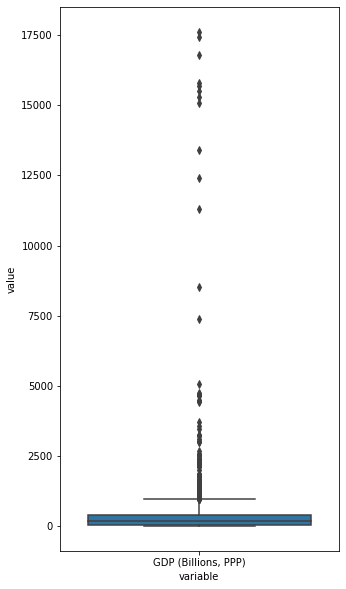

In [61]:
plt.figure(figsize=(5, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(X[['GDP (Billions, PPP)']]))

In [62]:
X['GDP (Billions, PPP)'] = np.log2(X['GDP (Billions, PPP)'])

<AxesSubplot:xlabel='variable', ylabel='value'>

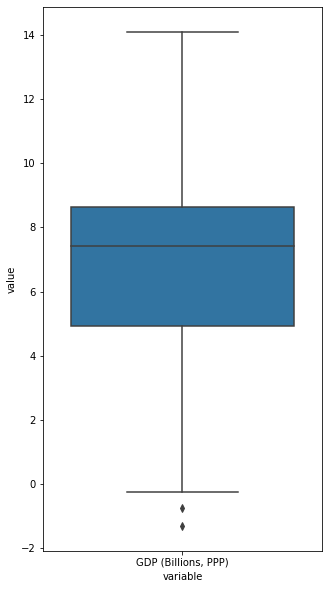

In [63]:
plt.figure(figsize=(5, 10))
sns.boxplot(x="variable", y="value", data=pd.melt(X[['GDP (Billions, PPP)']]))

In [64]:
X=X.drop(['Financial Freedom','Investment Freedom','Year Score','GDP per Capita (PPP)','GDP (Billions, PPP)','Tariff Rate (%)'], axis=1)

In [65]:
def correlation(dataset, threshold):
    col_corr = set()  # Set of all the names of correlated columns
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i, j]) > threshold: # we are interested in absolute coeff value
                colname = corr_matrix.columns[i]  # getting the name of column
                col_corr.add(colname)
    return col_corr

In [66]:
corr_features = correlation(X, 0.55)
len(set(corr_features))

11

In [67]:
corr_features

{'5 Year GDP Growth Rate (%)',
 'Business Freedom',
 'Corporate Tax Rate (%)',
 'Freedom from Corruption',
 'Gov Expenditure % of GDP',
 'Gov Spending',
 'Income Tax Rate (%)',
 'Inflation (%)',
 'Labor Freedom',
 'Monetary Freedom',
 'Trade Freedom'}

In [68]:
X=X.drop(corr_features,axis=1)   #removing the features

In [69]:
X=X.fillna(X.mean())

In [70]:
X.isnull().sum()

Unnamed: 0                               0
Property Rights                          0
Fiscal Freedom                           0
Tax Burden % of GDP                      0
Population (Millions)                    0
GDP Growth Rate (%)                      0
Unemployment (%)                         0
FDI Inflow (Millions)                    0
Public Debt (% of GDP)                   0
Asia-Pacific                             0
Europe                                   0
Middle East / North Africa               0
North America                            0
South and Central America / Caribbean    0
Sub-Saharan Africa                       0
dtype: int64

In [71]:
X.shape

(990, 15)

In [72]:
y.shape

(990, 5)

In [73]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.4, random_state=100)

In [74]:
y_train = pd.DataFrame(y_train)
y_test = pd.DataFrame(y_test)

In [75]:
y_train.head()

,1,2,3,4,5
616,1,0,0,0,0
151,0,0,0,1,0
341,0,0,0,1,0
396,0,1,0,0,0
271,0,0,0,1,0


In [76]:
import keras
from keras.datasets import mnist
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from tensorflow.keras.optimizers import RMSprop
from keras import utils as np_utils
import pylab as plt

In [77]:
batch_size = 128
num_classes = 5
epochs = 1000

In [78]:
X_train.shape

(594, 15)

In [79]:
y_train.shape

(594, 5)

In [105]:
first_layer_size = 12
model = Sequential()
model.add(Dense(first_layer_size, activation='relu', input_shape=(15,)))
model.add(Dense(13, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(11, activation='relu'))
model.add(Dropout(0.25))
model.add(Dense(9, activation='relu'))
model.add(Dense(5, activation='softmax'))

model.summary()

Model: "sequential_14"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_51 (Dense)             (None, 12)                192       
_________________________________________________________________
dense_52 (Dense)             (None, 13)                169       
_________________________________________________________________
dropout_2 (Dropout)          (None, 13)                0         
_________________________________________________________________
dense_53 (Dense)             (None, 11)                154       
_________________________________________________________________
dropout_3 (Dropout)          (None, 11)                0         
_________________________________________________________________
dense_54 (Dense)             (None, 9)                 108       
_________________________________________________________________
dense_55 (Dense)             (None, 5)               

In [106]:
model.compile(loss='binary_crossentropy',
              optimizer='RMSProp',
              metrics=['accuracy'])

In [107]:
history = model.fit(X_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/1000
5/5 [==============================] - 1s 2ms/step - loss: 276.7839 - accuracy: 0.1717
Epoch 2/1000
5/5 [==============================] - 0s 3ms/step - loss: 201.2803 - accuracy: 0.1667
Epoch 3/1000
5/5 [==============================] - 0s 3ms/step - loss: 168.9468 - accuracy: 0.1684
Epoch 4/1000
5/5 [==============================] - 0s 2ms/step - loss: 112.3780 - accuracy: 0.1684
Epoch 5/1000
5/5 [==============================] - 0s 2ms/step - loss: 104.7965 - accuracy: 0.1751
Epoch 6/1000
5/5 [==============================] - 0s 2ms/step - loss: 98.6345 - accuracy: 0.1717
Epoch 7/1000
5/5 [==============================] - 0s 2ms/step - loss: 76.2529 - accuracy: 0.1919
Epoch 8/1000
5/5 [==============================] - 0s 1ms/step - loss: 64.5577 - accuracy: 0.1684
Epoch 9/1000
5/5 [==============================] - 0s 2ms/step - loss: 63.5824 - accuracy: 0.1700
Epoch 10/1000
5/5 [==============================] - 0s 2ms/step - loss: 47.7089 - accuracy: 0.1852
Epoc

5/5 [==============================] - 0s 1ms/step - loss: 0.5268 - accuracy: 0.2626
Epoch 166/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.5662 - accuracy: 0.2492
Epoch 167/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4926 - accuracy: 0.2458
Epoch 168/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4936 - accuracy: 0.2441
Epoch 169/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4958 - accuracy: 0.2391
Epoch 170/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4945 - accuracy: 0.2222
Epoch 171/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4887 - accuracy: 0.2593
Epoch 172/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4963 - accuracy: 0.2508
Epoch 173/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4909 - accuracy: 0.2542
Epoch 174/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4856 - accuracy: 0.2643
Epoch 175/1000


5/5 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.3569
Epoch 248/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4555 - accuracy: 0.3620
Epoch 249/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4360 - accuracy: 0.3721
Epoch 250/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4321 - accuracy: 0.3838
Epoch 251/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4331 - accuracy: 0.3838
Epoch 252/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4329 - accuracy: 0.3721
Epoch 253/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4407 - accuracy: 0.3771
Epoch 254/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4473 - accuracy: 0.3670
Epoch 255/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4336 - accuracy: 0.3653
Epoch 256/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4308 - accuracy: 0.3653
Epoch 257/1000


5/5 [==============================] - 0s 2ms/step - loss: 0.4083 - accuracy: 0.3620
Epoch 330/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4105 - accuracy: 0.3737
Epoch 331/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.5075 - accuracy: 0.3721
Epoch 332/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4015 - accuracy: 0.3973
Epoch 333/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4041 - accuracy: 0.3687
Epoch 334/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4107 - accuracy: 0.4007
Epoch 335/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.5588 - accuracy: 0.3485
Epoch 336/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4199 - accuracy: 0.3569
Epoch 337/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4060 - accuracy: 0.3771
Epoch 338/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4011 - accuracy: 0.3872
Epoch 339/1000


5/5 [==============================] - 0s 1ms/step - loss: 0.7066 - accuracy: 0.4394
Epoch 412/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3940 - accuracy: 0.4428
Epoch 413/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3870 - accuracy: 0.4764
Epoch 414/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4202 - accuracy: 0.4663
Epoch 415/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3913 - accuracy: 0.4579
Epoch 416/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3956 - accuracy: 0.4377
Epoch 417/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4016 - accuracy: 0.4192
Epoch 418/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3921 - accuracy: 0.4781
Epoch 419/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4176 - accuracy: 0.4613
Epoch 420/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3820 - accuracy: 0.4478
Epoch 421/1000


5/5 [==============================] - 0s 2ms/step - loss: 0.3623 - accuracy: 0.5253
Epoch 494/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3718 - accuracy: 0.5135
Epoch 495/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3771 - accuracy: 0.4916
Epoch 496/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3762 - accuracy: 0.5152
Epoch 497/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4033 - accuracy: 0.4680
Epoch 498/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3680 - accuracy: 0.5185
Epoch 499/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3745 - accuracy: 0.5000
Epoch 500/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4002 - accuracy: 0.4461
Epoch 501/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3828 - accuracy: 0.5101
Epoch 502/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3756 - accuracy: 0.4781
Epoch 503/1000


5/5 [==============================] - 0s 1ms/step - loss: 0.3701 - accuracy: 0.5118
Epoch 576/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3546 - accuracy: 0.5522
Epoch 577/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3586 - accuracy: 0.5202
Epoch 578/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3591 - accuracy: 0.5471
Epoch 579/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3731 - accuracy: 0.4764
Epoch 580/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3806 - accuracy: 0.4832
Epoch 581/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3701 - accuracy: 0.5286
Epoch 582/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3586 - accuracy: 0.5253
Epoch 583/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3675 - accuracy: 0.5253
Epoch 584/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3581 - accuracy: 0.5067
Epoch 585/1000


5/5 [==============================] - 0s 1ms/step - loss: 0.3429 - accuracy: 0.5724
Epoch 658/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3412 - accuracy: 0.5842
Epoch 659/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3723 - accuracy: 0.5084
Epoch 660/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3672 - accuracy: 0.5303
Epoch 661/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3559 - accuracy: 0.5253
Epoch 662/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3578 - accuracy: 0.5404
Epoch 663/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3429 - accuracy: 0.5791
Epoch 664/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3613 - accuracy: 0.5253
Epoch 665/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.4276 - accuracy: 0.5118
Epoch 666/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3482 - accuracy: 0.5471
Epoch 667/1000


5/5 [==============================] - 0s 1ms/step - loss: 0.3529 - accuracy: 0.5707
Epoch 740/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3504 - accuracy: 0.5471
Epoch 741/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3616 - accuracy: 0.5556
Epoch 742/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3363 - accuracy: 0.5774
Epoch 743/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3522 - accuracy: 0.5471
Epoch 744/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3448 - accuracy: 0.5707
Epoch 745/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.5724
Epoch 746/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3390 - accuracy: 0.5993
Epoch 747/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3427 - accuracy: 0.5505
Epoch 748/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3424 - accuracy: 0.5572
Epoch 749/1000


5/5 [==============================] - 0s 1ms/step - loss: 0.3271 - accuracy: 0.6010
Epoch 822/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3244 - accuracy: 0.6010
Epoch 823/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3355 - accuracy: 0.5892
Epoch 824/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3522 - accuracy: 0.5808
Epoch 825/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3428 - accuracy: 0.5623
Epoch 826/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3493 - accuracy: 0.5707
Epoch 827/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3397 - accuracy: 0.5606
Epoch 828/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3943 - accuracy: 0.5219
Epoch 829/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3385 - accuracy: 0.5842
Epoch 830/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3370 - accuracy: 0.5892
Epoch 831/1000


5/5 [==============================] - 0s 2ms/step - loss: 0.3308 - accuracy: 0.5825
Epoch 904/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3360 - accuracy: 0.5707
Epoch 905/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3202 - accuracy: 0.5943
Epoch 906/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3372 - accuracy: 0.5842
Epoch 907/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.5499 - accuracy: 0.5404
Epoch 908/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3406 - accuracy: 0.5522
Epoch 909/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3440 - accuracy: 0.5606
Epoch 910/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.4050 - accuracy: 0.5589
Epoch 911/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3196 - accuracy: 0.5909
Epoch 912/1000
5/5 [==============================] - 0s 2ms/step - loss: 0.3184 - accuracy: 0.5926
Epoch 913/1000


5/5 [==============================] - 0s 1ms/step - loss: 0.3288 - accuracy: 0.5892
Epoch 986/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.5926
Epoch 987/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3571 - accuracy: 0.5976
Epoch 988/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3176 - accuracy: 0.6044
Epoch 989/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3260 - accuracy: 0.5960
Epoch 990/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3307 - accuracy: 0.5960
Epoch 991/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3252 - accuracy: 0.5707
Epoch 992/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3190 - accuracy: 0.6094
Epoch 993/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3160 - accuracy: 0.6246
Epoch 994/1000
5/5 [==============================] - 0s 1ms/step - loss: 0.3364 - accuracy: 0.6128
Epoch 995/1000


In [108]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: 0.3271021842956543
Test accuracy: 0.618686854839325


In [109]:
y_pred=model.predict(X_test)

In [217]:
first_layer_size = 12
model2 = Sequential()
model2.add(Dense(first_layer_size, activation='relu', input_shape=(18,)))
model2.add(Dense(15, activation='sigmoid'))
model2.add(Dropout(0.5)),
model2.add(Dense(13, activation='sigmoid'))
model2.add(Dense(9, activation='sigmoid'))
model2.add(Dense(7, activation='sigmoid'))
model2.add(Dense(5, activation='softmax'))

model2.summary()

Model: "sequential_17"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_73 (Dense)             (None, 12)                228       
_________________________________________________________________
dense_74 (Dense)             (None, 15)                195       
_________________________________________________________________
dropout (Dropout)            (None, 15)                0         
_________________________________________________________________
dense_75 (Dense)             (None, 13)                208       
_________________________________________________________________
dense_76 (Dense)             (None, 9)                 126       
_________________________________________________________________
dense_77 (Dense)             (None, 7)                 70        
_________________________________________________________________
dense_78 (Dense)             (None, 5)               

In [219]:
model2.compile(loss='binary_crossentropy',
              optimizer='RMSProp',
              metrics=['accuracy'])

In [220]:
history = model2.fit(X_train,y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=1)

Epoch 1/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.6109 - accuracy: 0.3370
Epoch 2/1000
3/3 [==============================] - 0s 500us/step - loss: 0.5999 - accuracy: 0.3370
Epoch 3/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.5929 - accuracy: 0.3370
Epoch 4/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.5870 - accuracy: 0.3370
Epoch 5/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.5816 - accuracy: 0.3370
Epoch 6/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.5767 - accuracy: 0.3370
Epoch 7/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.5719 - accuracy: 0.3370
Epoch 8/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.5677 - accuracy: 0.3370
Epoch 9/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.5636 - accuracy: 0.3370
Epoch 10/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.5595 - accuracy: 0.3370
Epoch 11/1000


3/3 [==============================] - 0s 2ms/step - loss: 0.4541 - accuracy: 0.3370
Epoch 84/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.4540 - accuracy: 0.3398
Epoch 85/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4538 - accuracy: 0.3370
Epoch 86/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4537 - accuracy: 0.3175
Epoch 87/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.4536 - accuracy: 0.3370
Epoch 88/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4535 - accuracy: 0.3370
Epoch 89/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4534 - accuracy: 0.3370
Epoch 90/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4533 - accuracy: 0.3370
Epoch 91/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.4533 - accuracy: 0.3370
Epoch 92/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.4532 - accuracy: 0.2981
Epoch 93/100

3/3 [==============================] - 0s 1ms/step - loss: 0.4505 - accuracy: 0.3565
Epoch 246/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4500 - accuracy: 0.3510
Epoch 247/1000
3/3 [==============================] - 0s 500us/step - loss: 0.4493 - accuracy: 0.3844
Epoch 248/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4500 - accuracy: 0.3649
Epoch 249/1000
3/3 [==============================] - 0s 999us/step - loss: 0.4488 - accuracy: 0.3565
Epoch 250/1000
3/3 [==============================] - 0s 500us/step - loss: 0.4495 - accuracy: 0.3955
Epoch 251/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.4497 - accuracy: 0.3872
Epoch 252/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4498 - accuracy: 0.3649
Epoch 253/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4493 - accuracy: 0.3788
Epoch 254/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4494 - accuracy: 0.3788
Epoch 

3/3 [==============================] - 0s 1ms/step - loss: 0.4365 - accuracy: 0.4234
Epoch 408/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4363 - accuracy: 0.4150
Epoch 409/1000
3/3 [==============================] - 0s 500us/step - loss: 0.4424 - accuracy: 0.4095
Epoch 410/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4351 - accuracy: 0.4318
Epoch 411/1000
3/3 [==============================] - 0s 500us/step - loss: 0.4327 - accuracy: 0.4485
Epoch 412/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4321 - accuracy: 0.4345
Epoch 413/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.4318 - accuracy: 0.4178
Epoch 414/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4372 - accuracy: 0.4234
Epoch 415/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.4330 - accuracy: 0.4345
Epoch 416/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4343 - accuracy: 0.4234
Epoch

3/3 [==============================] - 0s 1ms/step - loss: 0.4242 - accuracy: 0.4540
Epoch 570/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4167 - accuracy: 0.4513
Epoch 571/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4215 - accuracy: 0.4540
Epoch 572/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.4233 - accuracy: 0.4568
Epoch 573/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4188 - accuracy: 0.4847
Epoch 574/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4200 - accuracy: 0.4624
Epoch 575/1000
3/3 [==============================] - 0s 500us/step - loss: 0.4210 - accuracy: 0.4401
Epoch 576/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4175 - accuracy: 0.4568
Epoch 577/1000
3/3 [==============================] - 0s 2ms/step - loss: 0.4141 - accuracy: 0.4652
Epoch 578/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4155 - accuracy: 0.4680
Epoch 579/

3/3 [==============================] - 0s 1ms/step - loss: 0.4030 - accuracy: 0.4903
Epoch 732/1000
3/3 [==============================] - 0s 500us/step - loss: 0.4082 - accuracy: 0.4847
Epoch 733/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.4025 - accuracy: 0.5097
Epoch 734/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4044 - accuracy: 0.4930
Epoch 735/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4158 - accuracy: 0.4485
Epoch 736/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4123 - accuracy: 0.4457
Epoch 737/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4039 - accuracy: 0.4708
Epoch 738/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4047 - accuracy: 0.4819
Epoch 739/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.4064 - accuracy: 0.4847
Epoch 740/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4184 - accuracy: 0.4429
Epoch 7

3/3 [==============================] - 0s 1ms/step - loss: 0.3970 - accuracy: 0.4986
Epoch 894/1000
3/3 [==============================] - 0s 500us/step - loss: 0.3967 - accuracy: 0.4958
Epoch 895/1000
3/3 [==============================] - 0s 1000us/step - loss: 0.3818 - accuracy: 0.5320
Epoch 896/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.3823 - accuracy: 0.5320
Epoch 897/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.3880 - accuracy: 0.5292
Epoch 898/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.3851 - accuracy: 0.5292
Epoch 899/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.3807 - accuracy: 0.5348
Epoch 900/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.4112 - accuracy: 0.4819
Epoch 901/1000
3/3 [==============================] - 0s 500us/step - loss: 0.4160 - accuracy: 0.4930
Epoch 902/1000
3/3 [==============================] - 0s 1ms/step - loss: 0.3921 - accuracy: 0.5125
Epoch 90

In [221]:
score2 = model2.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score2[0])
print('Test accuracy:', score2[1])

Test loss: 0.391884982585907
Test accuracy: 0.4833333194255829
